In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:

import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm


In [4]:
normalized_data_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/상관분석/(정규화전)학습데이터.csv') 
normalized_data = normalized_data_row.copy()
normalized_data = normalized_data.iloc[:,3:]
normalized_data
sample = normalized_data_row.copy()
sample = sample[['Gu',	'Dong']]
sample
# Robust Scaler 이용한 정규화
# 중앙값0, 사분위수 IQR 기준 정규화


,Gu,Dong
0,동대문구,이문동
1,동대문구,장안동
2,동대문구,전농동
3,동대문구,회기동
4,동대문구,답십리동
...,...,...
82,중랑구,상봉동
83,중랑구,신내동
84,중랑구,중화동
85,종로구,창신동


In [5]:
소유자 = normalized_data_row['Pet_Owners']

In [6]:
from sklearn.preprocessing import RobustScaler

def normalization(normalized_data):
    scaler = RobustScaler()
    df_robust = scaler.fit_transform(normalized_data)
    return scaler, df_robust

def reverse_normalization(scaler, predict_data):
    reversed_predict_data = scaler.inverse_transform(predict_data)
    return reversed_predict_data

scaler, df_robust = normalization(normalized_data)
df_robust = pd.DataFrame(df_robust)
df_robust


,0,1,2,3,4,5,6,7,8,9
0,-0.211954,-0.386707,-0.148377,-0.545455,-0.727273,-0.5,-0.736842,-0.571429,-0.666667,-0.888889
1,0.422004,0.177644,0.244805,0.545455,0.727273,-0.5,0.736842,0.285714,0.666667,0.666667
2,0.000000,-0.300101,-0.282468,-0.363636,-0.727273,0.0,-0.631579,-0.285714,-0.500000,-0.666667
3,-0.806137,-0.813293,-0.810065,-0.727273,-0.727273,-0.5,-0.842105,-0.714286,-0.666667,-1.000000
4,0.102896,-0.173615,-0.094805,0.181818,-0.545455,-0.5,-0.210526,0.000000,-0.500000,-0.333333
...,...,...,...,...,...,...,...,...,...,...
82,-0.154398,-0.038268,-0.138961,-0.363636,0.181818,0.0,-0.105263,-0.285714,0.333333,-0.111111
83,0.136574,0.124068,0.000000,0.000000,-0.545455,0.0,-0.315789,0.000000,-0.333333,-0.333333
84,-0.173205,0.005639,-0.086039,0.000000,0.181818,-0.5,0.105263,-0.142857,0.166667,0.000000
85,-0.659656,-0.560725,-0.511688,-0.727273,-0.545455,-0.5,-0.736842,-0.714286,-0.500000,-0.888889


In [7]:
df_robust.rename(columns ={0:'Population', 
                                       1:'Pet_Owners',
                                       2:'Total_Registrations',	
                                       3:'hospital',
                                       4:'product',	
                                       5:'beauty',	
                                       6:'h+p',	
                                       7:'h+b',	
                                       8:'p+b',	
                                       9:'h+p+b'}, inplace=True)

df_robust
data = pd.concat([sample, df_robust], axis = 1)
data

,Gu,Dong,Population,Pet_Owners,Total_Registrations,hospital,product,beauty,h+p,h+b,p+b,h+p+b
0,동대문구,이문동,-0.211954,-0.386707,-0.148377,-0.545455,-0.727273,-0.5,-0.736842,-0.571429,-0.666667,-0.888889
1,동대문구,장안동,0.422004,0.177644,0.244805,0.545455,0.727273,-0.5,0.736842,0.285714,0.666667,0.666667
2,동대문구,전농동,0.000000,-0.300101,-0.282468,-0.363636,-0.727273,0.0,-0.631579,-0.285714,-0.500000,-0.666667
3,동대문구,회기동,-0.806137,-0.813293,-0.810065,-0.727273,-0.727273,-0.5,-0.842105,-0.714286,-0.666667,-1.000000
4,동대문구,답십리동,0.102896,-0.173615,-0.094805,0.181818,-0.545455,-0.5,-0.210526,0.000000,-0.500000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
82,중랑구,상봉동,-0.154398,-0.038268,-0.138961,-0.363636,0.181818,0.0,-0.105263,-0.285714,0.333333,-0.111111
83,중랑구,신내동,0.136574,0.124068,0.000000,0.000000,-0.545455,0.0,-0.315789,0.000000,-0.333333,-0.333333
84,중랑구,중화동,-0.173205,0.005639,-0.086039,0.000000,0.181818,-0.5,0.105263,-0.142857,0.166667,0.000000
85,종로구,창신동,-0.659656,-0.560725,-0.511688,-0.727273,-0.545455,-0.5,-0.736842,-0.714286,-0.500000,-0.888889


In [8]:
# 필요없는 열 제거
data = data.drop(['Gu','Dong','product','beauty','p+b'],axis=1)
data.head(1)

,Population,Pet_Owners,Total_Registrations,hospital,h+p,h+b,h+p+b
0,-0.211954,-0.386707,-0.148377,-0.545455,-0.736842,-0.571429,-0.888889


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           87 non-null     float64
 1   Pet_Owners           87 non-null     float64
 2   Total_Registrations  87 non-null     float64
 3   hospital             87 non-null     float64
 4   h+p                  87 non-null     float64
 5   h+b                  87 non-null     float64
 6   h+p+b                87 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


In [10]:
# 독립변수, 종속변수 분리

# 함수 사용하여 데이터 분리
independent = list(data.columns.difference(['Pet_Owners']))
# 'Pet_Owners'란 이름과 다른 열을 리스트로 뽑음

# 독립변수들
independent = data[independent]

# 독립변수 나누기
independent_registration = independent[['Total_Registrations']]
independent_reg_pop = independent[['Total_Registrations','Population']]
independent_reg_pop_h = independent[['Total_Registrations','Population', 'hospital']]

# 종속변수들
bound = 소유자

# 독립변수 확인
independent.columns

Index(['Population', 'Total_Registrations', 'h+b', 'h+p', 'h+p+b', 'hospital'], dtype='object')

In [11]:
# independent_registration

# 학습데이터(test)와 평가데이터(train) 8:2 비율로 만들기

x1 = independent_registration   # 독립변수 = 총등록수
x2 = independent_reg_pop        # 독립변수 = 총등록수, 인구수
x3 = independent_reg_pop_h      # 독립변수 = 총등록수, 인구수, 병원
y = bound                       # 종속변수 = 소유자수
train_x1, test_x1, train_x2, test_x2, train_x3, test_x3, train_y, test_y = train_test_split(x1, x2, x3, y, test_size =0.2, random_state=42 )

train_x1 = np.array(train_x1).reshape(-1,1)
test_x1 = np.array(test_x1).reshape(-1,1)
train_x2 = train_x2.astype(float)
test_x2 = test_x2.astype(float)
train_x3 = train_x3.astype(float)
test_x3 = test_x3.astype(float)

train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)
test_y = pd.DataFrame(test_y)
#train_y = pd.DataFrame(train_y)

print('train_x1.shape = ', train_x1.shape,'test_x1.shape = ', test_x1.shape) 
print('train_x2.shape = ', train_x2.shape,'test_x2.shape = ', test_x2.shape) 
print('train_x3.shape = ', train_x3.shape,'test_x3.shape = ', test_x3.shape) 
print('train_y.shape = ', train_y.shape, 'test_y.shape = ',test_y.shape) 

train_x1.shape =  (69, 1) test_x1.shape =  (18, 1)
train_x2.shape =  (69, 2) test_x2.shape =  (18, 2)
train_x3.shape =  (69, 3) test_x3.shape =  (18, 3)
train_y.shape =  (69, 1) test_y.shape =  (18, 1)


회귀분석 모델 구축
- x : registration

n_estimators=25, max_depth=5, random_state=100 >> 총 정확도: 92.05%
n_estimators=20, max_depth=5, random_state=20 >> 총 정확도: 91.86%

In [12]:
# 기본적인 random forest 모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # 정확도 함수

# clf : Classifier (분류)
clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=20)
# n_estimators=20 20개의 의사결정 트리를 만든다 
#>> 이 값이 클수록 모델의 복잡도 증가, 성능 향상 증가
# max_depth=5 트리의 최대 깊이
#>> 모델의 깊이를 제한함으로써 모델의 과적합 방지
#>> 각 트리가 너무 깊게 성장하지 않도록 함

clf.fit(train_x1, train_y)
# fit 메서드를 호출하면 입력데이터와 출력데이터 사이의 관계를 학습

predict1 = clf.predict(test_x1) 
predict1 = pd.DataFrame(predict1)

#print(accuracy_score(test_y, predict1))

#accuracy = accuracy_score(test_y, predict1)
#print(f'{accuracy:.2f}')
# predict1은 test_x에 대한 에측된 출력값을 계산
# accuracy_score 함수는 예측된 출력 값 predict1과 실제 정답 데이터 test_y를 
# 비교하여 분류 모델의 정확도를 계산

# 1에 가까울수록 모델이 더 정확하게 예측


# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict1)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict1.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
        
        
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')


0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3871.00
예측의 정확도: 98.32%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1919.00
예측의 정확도: 57.22%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1621.00
예측의 정확도: 94.33%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2511.00
예측의 정확도: 100.00%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2488.00
예측의 정확도: 90.30%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 9567.00
예측의 정확도: 99.70%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4551.00
예측의 정확도: 96.54%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 670.00
예측의 정확도: 100.00%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 2039.00
예측의 정확도: 91.14%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4551.00
예측의 정확도: 88.27%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2039.00
예측의 정확도: 87.96%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 1127.00
예측의 정확도: 89.40%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1361.00
예측의 정확도: 88.63%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 7477.00
예측의 정확도: 96.45%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 2361.00
예측의 정확도: 90.39%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3871.00
예측의 정확도: 98.52%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 9567.00
예측의 정확도: 91.01%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2361.00
예측의 정확도: 95.35%
-

C:\Users\82108\AppData\Local\Temp\ipykernel_26508\3804804011.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x1, train_y)


In [13]:
# Random Forest Sample 개수 증가, 깊이 증가

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # 정확도 함수

# clf : Classifier (분류)
clf = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=100)
# n_estimators=20 20개의 의사결정 트리를 만든다 
#>> 이 값이 클수록 모델의 복잡도 증가, 성능 향상 증가
# max_depth=5 트리의 최대 깊이
#>> 모델의 깊이를 제한함으로써 모델의 과적합 방지
#>> 각 트리가 너무 깊게 성장하지 않도록 함

clf.fit(train_x1, train_y)
# fit 메서드를 호출하면 입력데이터와 출력데이터 사이의 관계를 학습

predict1 = clf.predict(test_x1) 
predict1 = pd.DataFrame(predict1)

#print(accuracy_score(test_y, predict1))

#accuracy = accuracy_score(test_y, predict1)
#print(f'{accuracy:.2f}')
# predict1은 test_x에 대한 에측된 출력값을 계산
# accuracy_score 함수는 예측된 출력 값 predict1과 실제 정답 데이터 test_y를 
# 비교하여 분류 모델의 정확도를 계산

# 1에 가까울수록 모델이 더 정확하게 예측


# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict1)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict1.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
        
        
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3848.00
예측의 정확도: 98.92%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1919.00
예측의 정확도: 57.22%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1621.00
예측의 정확도: 94.33%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2511.00
예측의 정확도: 100.00%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2494.00
예측의 정확도: 90.04%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 9567.00
예측의 정확도: 99.70%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4551.00
예측의 정확도: 96.54%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 670.00
예측의 정확도: 100.00%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 2039.00
예측의 정확도: 91.14%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4551.00
예측의 정확도: 88.27%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2039.00
예측의 정확도: 87.96%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 1127.00
예측의 정확도: 89.40%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1247.00
예측의 정확도: 97.95%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 7477.00
예측의 정확도: 96.45%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 2361.00
예측의 정확도: 90.39%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3820.00
예측의 정확도: 97.23%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 9567.00
예측의 정확도: 91.01%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2039.00
예측의 정확도: 90.38%
-

C:\Users\82108\AppData\Local\Temp\ipykernel_26508\1247922122.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x1, train_y)


회귀분석 모델 구축
- x : registration + population

n_estimators=20, max_depth=10, random_state=100 >> 총 정확도: 90.01%

In [14]:
# 학습 데이터를 활용하여 반려동물 등록 수와 소유자 수 사이의 관계 파악

# clf : Classifier (분류)
clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=100)

clf.fit(train_x2, train_y)
# fit 메서드를 호출하면 입력데이터와 출력데이터 사이의 관계를 학습

predict2 = clf.predict(test_x2) 
predict2 = pd.DataFrame(predict2)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict2)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict2.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict2.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict2.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3820.00
예측의 정확도: 99.66%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1932.00
예측의 정확도: 56.25%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1715.00
예측의 정확도: 88.20%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2511.00
예측의 정확도: 100.00%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2447.00
예측의 정확도: 92.11%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 9567.00
예측의 정확도: 99.70%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4738.00
예측의 정확도: 92.29%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 670.00
예측의 정확도: 100.00%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 1621.00
예측의 정확도: 86.55%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4551.00
예측의 정확도: 88.27%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2152.00
예측의 정확도: 92.84%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 917.00
예측의 정확도: 89.99%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1247.00
예측의 정확도: 97.95%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 7477.00
예측의 정확도: 96.45%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 1621.00
예측의 정확도: 62.06%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3820.00
예측의 정확도: 97.23%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 9567.00
예측의 정확도: 91.01%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2488.00
예측의 정확도: 89.72%
--

C:\Users\82108\AppData\Local\Temp\ipykernel_26508\2942195078.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x2, train_y)


회귀분석 모델 구축
- x : registration + population + hospital

In [15]:
# 학습 데이터를 활용하여 독립변수(반려동물 등록 수와 소유자 수, 병원 수)와 종속변수 사이의 관계 파악
clf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=20)

clf.fit(train_x3, train_y)
# fit 메서드를 호출하면 입력데이터와 출력데이터 사이의 관계를 학습

predict3 = clf.predict(test_x3) 
predict3 = pd.DataFrame(predict2)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict3)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict3.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict3.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict3.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

C:\Users\82108\AppData\Local\Temp\ipykernel_26508\2434793818.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x3, train_y)


0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3820.00
예측의 정확도: 99.66%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1932.00
예측의 정확도: 56.25%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1715.00
예측의 정확도: 88.20%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2511.00
예측의 정확도: 100.00%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2447.00
예측의 정확도: 92.11%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 9567.00
예측의 정확도: 99.70%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4738.00
예측의 정확도: 92.29%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 670.00
예측의 정확도: 100.00%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 1621.00
예측의 정확도: 86.55%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4551.00
예측의 정확도: 88.27%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2152.00
예측의 정확도: 92.84%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 917.00
예측의 정확도: 89.99%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1247.00
예측의 정확도: 97.95%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 7477.00
예측의 정확도: 96.45%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 1621.00
예측의 정확도: 62.06%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3820.00
예측의 정확도: 97.23%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 9567.00
예측의 정확도: 91.01%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2488.00
예측의 정확도: 89.72%
--

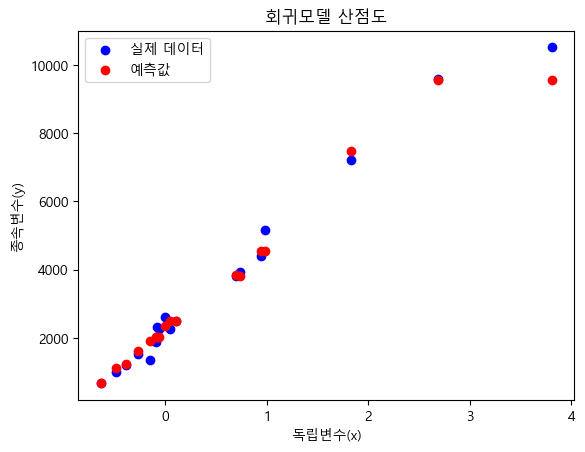

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.scatter(test_x1, test_y, color='blue', label='실제 데이터')
plt.scatter(test_x1, predict1, color='red', label='예측값')
plt.xlabel('독립변수(x)')
plt.ylabel('종속변수(y)')
plt.title('회귀모델 산점도')
plt.legend()
plt.show()